# 선형회귀 모델 작성, 예측, 평가

#LinearRegressor & RandomForestRegressor()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data1/premium.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
# 중복 데이터 확인 및 제거
display(df[df.duplicated(keep=False)])
df = df.drop_duplicates()

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

In [4]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20548\1321925332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
col_lst = ['sex', 'smoker', 'region']
for col in col_lst:
	encoder = LabelEncoder()
	df[col] = encoder.fit_transform(df[col])

df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

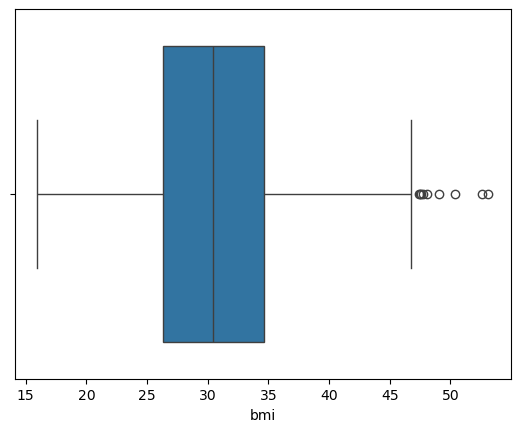

In [6]:
sns.boxplot(data=df, x='bmi')
plt.show()

In [7]:
df.loc[df['bmi'] > 47]

age  sex    bmi  children  smoker  region      charges
116    58    1  49.06         0       0       2  11381.32540
286    46    0  48.07         2       0       0   9432.92530
401    47    1  47.52         1       0       2   8083.91980
543    54    0  47.41         0       1       2  63770.42801
847    23    1  50.38         1       0       2   2438.05520
860    37    0  47.60         2       1       3  46113.51100
1047   22    1  52.58         1       1       2  44501.39820
1088   52    1  47.74         1       0       2   9748.91060
1317   18    1  53.13         0       0       2   1163.46270

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
from sklearn.model_selection import train_test_split
X = df_scaled[:, :-1]
y = df_scaled[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse

(np.float64(0.07035311342598079), np.float64(0.010675822560356952))

In [13]:
rmse = np.sqrt(mse)
rmse

np.float64(0.10332387217074741)

In [14]:
r2_score(y_test, y_pred)

np.float64(0.7509301700456745)

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# 예측하기
r_pred = model.predict(X_test)
# 필요한 모듈을 import 하고 성능평가지표 적용하기
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, r_pred)
mse = mean_squared_error(y_test, r_pred)


# 성능평가값 출력하기
print(f'RandomForestRegressor 모델 -  MAE : {round(mae, 4)} /  MSE : {round(mse, 4)}')

RandomForestRegressor 모델 -  MAE : 0.0484 /  MSE : 0.0072


In [17]:
r2_score(y_test, r_pred)

np.float64(0.8310167927088908)

In [18]:
# CV

In [24]:
# 다항회귀
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [25]:
model_poly = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train)
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)
r2_score(y_test, pred_poly)

np.float64(0.8337409202196342)

2차~5차 다항회귀 시뮬레이션

In [49]:
results = []
best_r2=-np.inf
best_model = None
best_pred = None

for degree in range(1,6):
  model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly = model_poly.predict(X_test)
  mse = mean_squared_error(y_test, pred_poly)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, pred_poly)
  
  results.append({ 'degree':degree,
                  'MSE':mse,
                  'RMSE':rmse,
                  'R2': r2})
  if r2> best_r2:
    best_r2 = r2
    best_model = model_poly
    best_pred = pred_poly
    
pd.DataFrame(results)

degree       MSE      RMSE        R2
0       1  0.010676  0.103324  0.750930
1       2  0.007126  0.084418  0.833741
2       3  0.006898  0.083057  0.839058
3       4  0.009720  0.098590  0.773232
4       5  0.024730  0.157258  0.423039

MSE(오차의 제곱을 평균한 것) : 작을 수록 좋다   
RMSE(MSE에 루트를 씌운 것) : 작을 수록 좋다   
R2(회귀 모델의 설명력, 모델이 설명 가능한 비율) : 1에 가까울 수록 좋음

In [27]:
best_model.named_steps['poly'].degree

3

# 규제 회귀 모델

In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [31]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

### Ridge

In [32]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

In [33]:
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)

In [34]:
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv mse: {ridge_mse:4f}, r2 : {ridge_r2:4f}')

ridge cv mse: 0.010680, r2 : 0.750829


In [35]:
ridge_cv.alpha_

np.float64(0.1)

In [36]:
ridge_cv.coef_

array([ 0.17971022, -0.00306188,  0.17864556,  0.03937077,  0.37908391,
       -0.01755909])

### LassoCV

In [37]:
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

In [38]:
print(f"[개선 Lasso] 최적 alpha: {lasso_cv.alpha_}")
print(f"MSE: {lasso_mse:.3f}, R2: {lasso_r2:.3f}")

[개선 Lasso] 최적 alpha: 0.001
MSE: 0.011, R2: 0.744


In [39]:
lasso_cv.coef_

array([ 0.17177941, -0.        ,  0.13930144,  0.02228289,  0.37272482,
       -0.00755972])

In [40]:
ridge_cv.coef_

array([ 0.17971022, -0.00306188,  0.17864556,  0.03937077,  0.37908391,
       -0.01755909])

### 엘라스틱넷

In [72]:
enet = ElasticNet(alpha=0.00001, l1_ratio=0.5, max_iter=5000)
enet.fit(X_train, y_train)

ElasticNet(alpha=1e-05, max_iter=5000)

In [73]:
enet_pred = enet.predict(X_test)
print("\n[엘라스틱넷 회귀]")
print("MSE:", mean_squared_error(y_test, enet_pred))
print("R2:", r2_score(y_test, enet_pred))


[엘라스틱넷 회귀]
MSE: 0.01067709584590203
R2: 0.7509004639492681


# 모델 성능 비교

In [74]:
results = pd.DataFrame({
  '모델' : ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
  'MSE': [ mean_squared_error(y_test, pred_poly),
          mean_squared_error(y_test, ridge_preds),
          mean_squared_error(y_test, lasso_preds),
          mean_squared_error(y_test, enet_pred),
        ],
  'R2': [r2_score(y_test, best_pred),
          r2_score(y_test, ridge_preds),
          r2_score(y_test, lasso_preds),
          r2_score(y_test, enet_pred),
  ]
})
results

모델       MSE        R2
0     다항회귀  0.024730  0.839058
1     릿지회귀  0.010680  0.750829
2     라쏘회귀  0.010979  0.743853
3  엘라스틱넷회귀  0.010677  0.750900